# Credit Card Customer Segmentation
![customer.jpg](customer.jpg)

# Table of Contents
1. [**Introduction**](#1)
2. [**Exploratory Data Analysis**](#2)

<a id='1'></a>
# Introduction
In this project, we'll be working with a credit card company. The dataset contains information about the company's clients and we're asked to help segment them into different groups in order to apply different business strategies for each type of customer. 

For instance, the company could provide higher credit limits for customers that use a card a lot, but spend little money, or even create incentives for those with high income who don't use the card as much as the company expects. In order to apply different strategies, the company needs different groups of customers. 

**Goal**       
We will use the K-means algorithm to segment the data, obtain a group for each client and an explanation of the characteristics of each group and the main point that make them different. 

<a id='2'><a/>
# Exploratory Data Analysis
Here's the data dictionary:
* `customer_id`: unique identifier for each customer.
* `age`: customer age in years
* `gender`: customer gender (M or F)
* `dependent_count`: number of dependents of each customer.
* `education_level`: level of education ("High School", "Graduate", etc.).
* `marital_status`: marital status ("Single", "Married", etc.).
* `estimated_income`: the estimated income for the customer projected by the data science team.
* `months_on_book`: time as a customer in months.
* `total_relationship_count`: number of times the customer contacted the company.
* `months_inactive_12_mon`: number of months the customer did not use the credit card in the last 12 months.
* `credit_limit`: customer's credit limit.
* `total_trans_amount`: the overall amount of money spent on the card by the customer.
* `total_trans_count`: the overall number of times the customer used the card.
* `avg_utilization_ratio`: daily average utilization ratio.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
customer = pd.read_csv('customer_segmentation.csv')
customer.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [3]:
customer.shape

(10127, 14)

In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

The dataset contains `10127` records and `14` colums, including a unique identifier for each client, which is not going to be needed for the segmentation. 

In [5]:
customer.dtypes

customer_id                   int64
age                           int64
gender                       object
dependent_count               int64
education_level              object
marital_status               object
estimated_income              int64
months_on_book                int64
total_relationship_count      int64
months_inactive_12_mon        int64
credit_limit                float64
total_trans_amount            int64
total_trans_count             int64
avg_utilization_ratio       float64
dtype: object

In [6]:
customer.dtypes.value_counts()

int64      9
object     3
float64    2
dtype: int64

Of the `13` columns left, there are 8 columns containing integers, 2 containing floats and 3 containing strings, which means we have 3 categorical columns to deal with. 

In [7]:
customer.isnull().sum()

customer_id                 0
age                         0
gender                      0
dependent_count             0
education_level             0
marital_status              0
estimated_income            0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
credit_limit                0
total_trans_amount          0
total_trans_count           0
avg_utilization_ratio       0
dtype: int64

There are no missing values in the dataset! Let's now look at the numerical variables first.

In [8]:
# drop the customer_id column
customer.drop(['customer_id'], axis=1, inplace=True)
customer.describe()

,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,62078.206774,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,8.016814,1.298908,39372.861291,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,26.000000,0.000000,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,41.000000,1.000000,32000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,46.000000,2.000000,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,52.000000,3.000000,80000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000
max,73.000000,5.000000,200000.000000,56.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000


**Insights**     
* The average age of customers is `46` years.
* The range of the income of the customers is `180,000`.
* We have customers who have been with the company for as long as `56` months. 
* The maximum number of times a customer has contacted the company is `6` times. 
* The `credit_limit` data is right skewed with a mean of `~8632` and a median of `~4549`.
* `estimated_income` is also right skewed. 

We can now look at the categorical columns from the dataset. All of the categorical columns are of dtype `object`. We can summarize them as follows: 

In [9]:
customer.describe(include=['object'])

,gender,education_level,marital_status
count,10127,10127,10127
unique,2,6,4
top,F,Graduate,Married
freq,5358,3685,4687


`education_level` has 6 unique values. Let's look at these different values available. 

In [10]:
customer['education_level'].value_counts()

Graduate         3685
High School      2351
Uneducated       1755
College          1192
Post-Graduate     616
Doctorate         528
Name: education_level, dtype: int64

Most of the customers are graduates, but we also have a number of them who are uneducated. To better understand the results from the different categories, we will visualize them to get the information at a glance. 

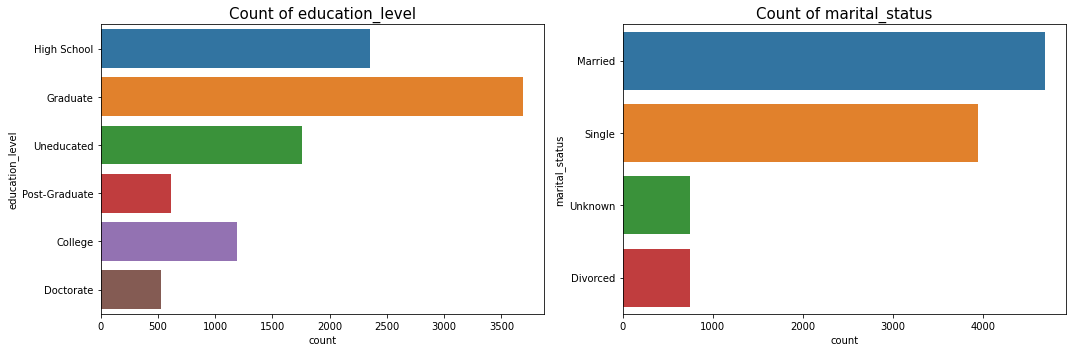

In [11]:
categorical = ['education_level', 'marital_status']
fig = plt.figure(figsize=(15,5))

for idx, col in enumerate(categorical):
    ax = plt.subplot(1, 2, idx+1)
    sns.countplot(y=customer[col], ax=ax, orient='h')
    ax.set_title(f'Count of {col}', size=15)
    
fig.tight_layout()
plt.show()

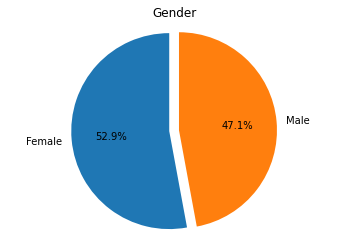

In [12]:
labels = ['Female', 'Male']
sizes = customer['gender'].value_counts()
explode = (0.1, 0)
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Gender')

plt.show()

* A majority of the customers have graduated from college. We also have a few with higher degrees. 
* Married and single people comprise the largest groups in the `marital_status` category.
* The female customers are slightly more than the male customers.

As we are working with unsupervised machine learning, there isn't a target variable on which we can measure the impacts of the other variables. We can however, look at the correlation between the numeric variables and their distributions. 

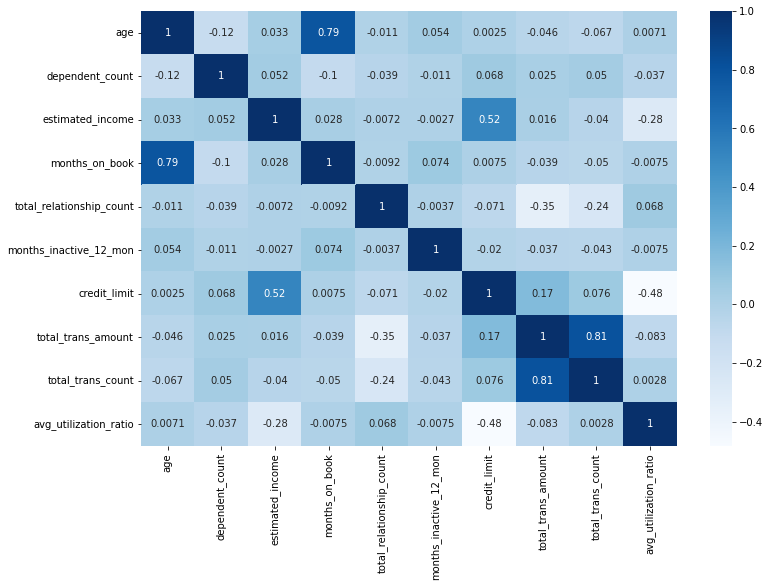

In [13]:
correlations  = customer.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap='Blues')
plt.show()

**Insights**    
* Most of the variables present weak correlations between each other.
* `Age` is strongly correlated with how long the person has been a customer (`months_on_book`).
* `credit_limit` is positively correlated with `estimated_income` and negatively correlated with `avg_utilization_ratio`.
* As expected, `total_trans_count` is strongly correlated with the `total_trans_count`(total number of transactions).

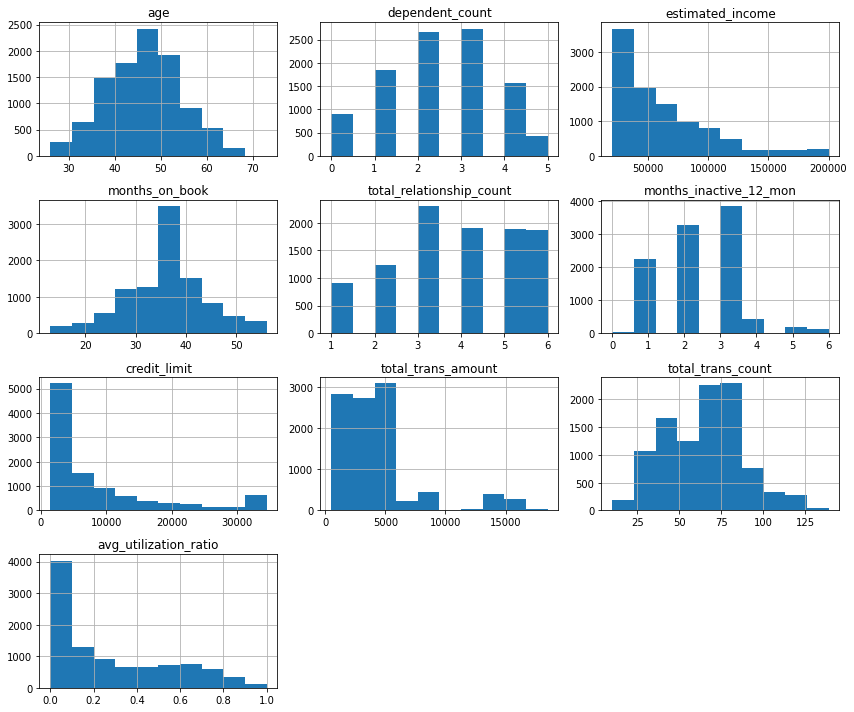

In [14]:
fig, ax = plt.subplots(figsize=(12, 10))
customer.hist(ax=ax)

plt.tight_layout()
plt.show()

**Insights**    
* `age` and `months_on_book` are closer to a normal distribution.
* `estimated_income`, `credit_limit`, `avg_utilization_ratio`, `total_trans_amount` have a right skewed distribution. 

# Feature Engineering
We will now deal with the 3 categorical columns that we have. 

Firstly, the `gender` column contains only 2 unique values, `M` and `F`, which means it's possible to replace all the rows with 1 and 0.

For the `education_level`, we have 6 unique values. This column represents levels of eduction, and it's possible to rank then from the lowest to the highest, so it's possible to replace each unique level with a number, assuming we respect the order, as follows:
* Uneducated - 0
* High School - 1
* College - 2
* Graduate - 3
* Post-Graduate - 4
* Doctorate - 5

Lastly, the `marital_status` contains 4 unique values. Unlike the level of education column, there is no level of magnitude between `Single`, `Married` or `Divorced`. We can't rank these categories objectively. Therefore we will use one-hot encoding to create dummy variables for this column. 


In [15]:
customer_modif = customer.copy()
customer_modif['gender'] = customer['gender'].apply(lambda x: 1 if x == 'M'
                                                   else 0)
customer_modif['gender'].head()

0    1
1    0
2    1
3    0
4    1
Name: gender, dtype: int64

In [16]:
customer_modif.replace(to_replace={'Uneducated': 0,
                                   'High School': 1,
                                   'College': 2,
                                   'Graduate': 3,
                                   'Post-Graduate':4, 
                                   'Doctorate': 5}, inplace=True)
customer_modif['education_level'].head()

0    1
1    3
2    3
3    1
4    0
Name: education_level, dtype: int64

In [17]:
dummies = pd.get_dummies(customer_modif[['marital_status']], drop_first=True)

customer_modif = pd.concat([customer_modif, dummies], axis=1)
customer_modif.drop(['marital_status'], axis=1, inplace=True)

customer_modif.head()

,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
0,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,1,0,0
1,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,0,1,0
2,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,1,0,0
3,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,0,0,1
4,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,1,0,0


In [18]:
customer_modif.shape

(10127, 15)

We now have `15` columns in our modified dataset. 

# Scaling the Data
We have different scaled data across the dataframe. The `estimated_income`, for instance, contains numbers in the range of dozens and hundreds of thousands, while the `dependent_count` column contains numbers from 1 to 5.  

Let us now transform the data so it's all on the same scale. 

In [19]:
X = customer_modif

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
X_scaled[:5]

array([[-0.16540558,  1.05995565,  0.50336813, -0.75221102,  0.1758098 ,
         0.38462088,  0.76394261, -1.32713603,  0.4466219 , -0.95970657,
        -0.97389518, -0.77588223,  1.07733799, -0.79850685, -0.28260887],
       [ 0.33357038, -0.9434357 ,  2.04319867,  0.66278684, -0.96716585,
         1.01071482,  1.40730617, -1.32713603, -0.04136665, -0.91643261,
        -1.35734038, -0.61627565, -0.92821381,  1.2523374 , -0.28260887],
       [ 0.58305837,  1.05995565,  0.50336813,  0.66278684,  0.78539682,
         0.00896451,  0.12057905, -1.32713603, -0.5736978 , -0.74098169,
        -1.91120566, -0.99715499,  1.07733799, -0.79850685, -0.28260887],
       [-0.78912553, -0.9434357 ,  1.2732834 , -0.75221102, -0.63697289,
        -0.24147306, -0.52278451,  1.64147829, -0.58525108, -0.95175829,
        -1.91120566,  1.75968594, -0.92821381, -0.79850685,  3.53845931],
       [-0.78912553,  1.05995565,  0.50336813, -1.45970995,  0.07421197,
        -1.86931731,  0.76394261, -1.32713603, 

# Choosing K
Our dataset is ready for machine learning. The next step is to decide the best number of clusters to use in the segmentation according to the inertia metric.

We'll have to create several models and compute the inertia for each of them. Then, we'll be able to plot the Elbow Curve and decide the number of clusters we'll use to segment the customers, which is K.

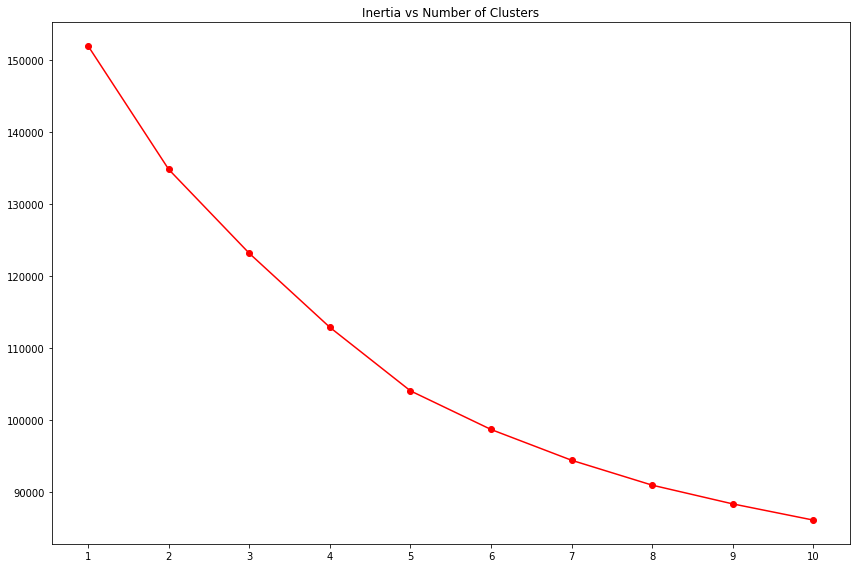

In [20]:
X = pd.DataFrame(X_scaled)
inertias = []

for k in range(1, 11):
    model = KMeans(n_clusters=k)
    y = model.fit_predict(X)
    inertias.append(model.inertia_)
    
plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), inertias, marker='o', color='red')
plt.xticks(ticks=range(1, 11), labels=range(1, 11))
plt.title('Inertia vs Number of Clusters')

plt.tight_layout()
plt.show()

The rate of decreasing of inertia slows down between `5` and `7` clusters. We will use `6` clusters moving forward.

In [21]:
model = KMeans(n_clusters=6)
y = model.fit_predict(X)
y

array([5, 4, 5, ..., 1, 3, 1], dtype=int32)

# Analyzing Results
Now, let's create a `CLUSTER` column in our original dataset so we can better understand the characteristics of each one

In [22]:
customer['CLUSTER'] = y + 1
customer.head()

,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,CLUSTER
0,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061,6
1,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,5
2,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,6
3,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760,4
4,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,2


We can visualize the number of customers in each cluster. 

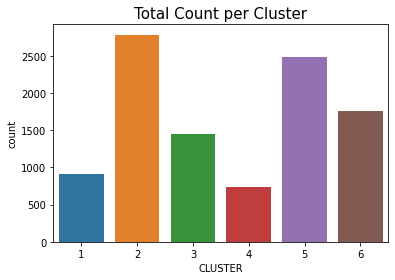

In [23]:
ax = sns.countplot(data=customer, x='CLUSTER')
plt.title('Total Count per Cluster', size=15)
plt.show()

Cluster `3` is the largest while cluster `6` is the smallest. 

Let's start with the numeric variables. We'll check on the average value of each variable per cluster. We will group the data and plot a bar chart for each column.

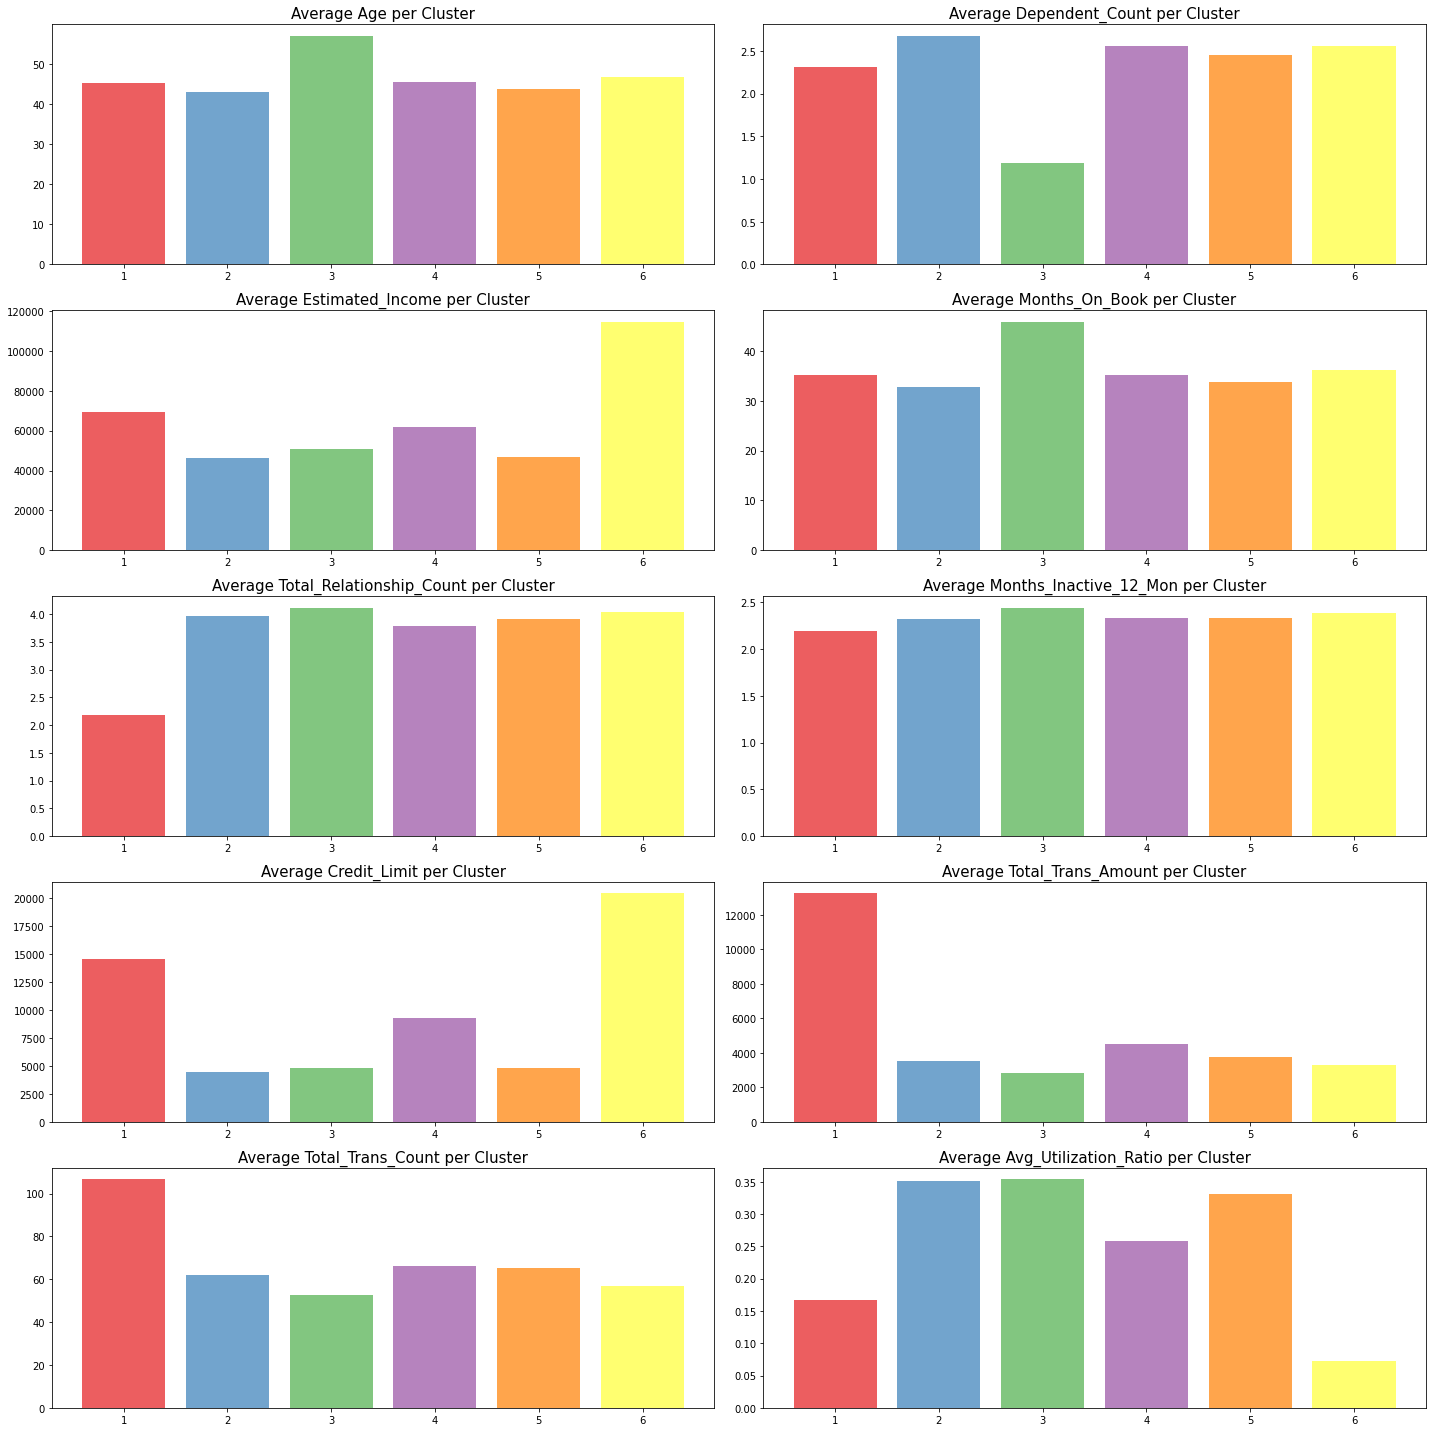

In [24]:
numerical = customer.select_dtypes(include=np.number).drop(['CLUSTER'],
                                                          axis=1)

fig = plt.figure(figsize=(20, 20))
for idx, col in enumerate(numerical):
    df_plot = customer.groupby('CLUSTER')[col].mean()
    ax = fig.add_subplot(5, 2, idx+1)
    ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set1'),
          alpha=0.7)
    ax.set_title(f'Average {col.title()} per Cluster', size=15)
    
plt.tight_layout()
plt.show()

For those numerical variables with higher correlations we saw earlier, we can also use a scatter plot to visualize this correlation grouped by clusters and analyze how the clusters change between each area of the chart.

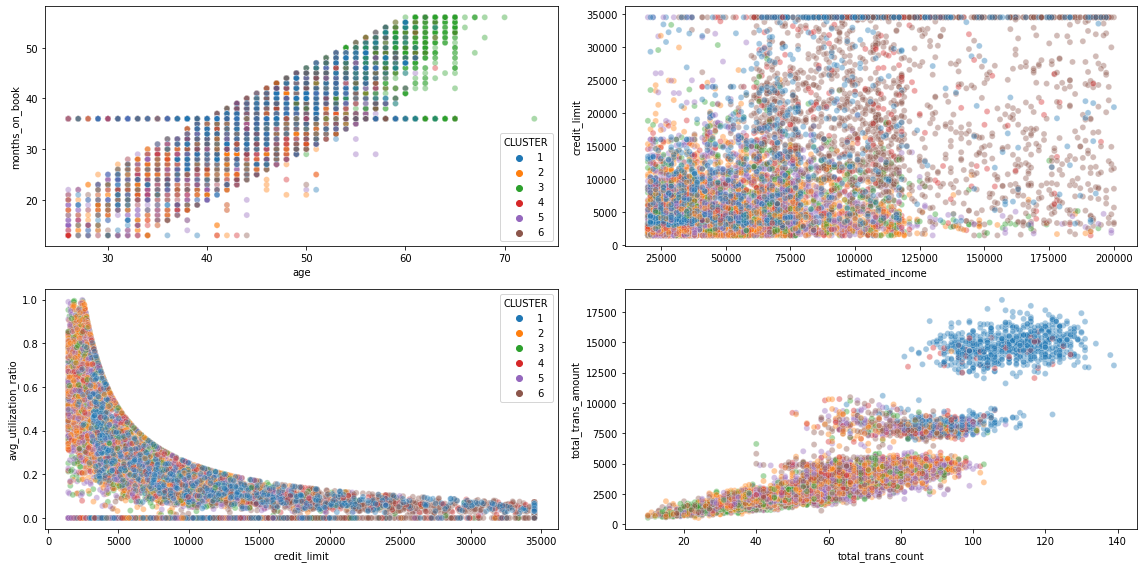

In [25]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8))
sns.scatterplot(x='age', y='months_on_book', hue='CLUSTER', data=customer, palette='tab10', alpha=0.4, ax=ax1)
sns.scatterplot(x='estimated_income', y='credit_limit', hue='CLUSTER', data=customer, palette='tab10', alpha=0.4, ax=ax2, legend=False)
sns.scatterplot(x='credit_limit', y='avg_utilization_ratio', hue='CLUSTER', data=customer, palette='tab10', alpha=0.4, ax=ax3)
sns.scatterplot(x='total_trans_count', y='total_trans_amount', hue='CLUSTER', data=customer, palette='tab10', alpha=0.4, ax=ax4, legend=False)

plt.tight_layout()
plt.show()

**Insights**
* Older customers are grouped in `Cluster 1`, who are also the clients who have stayed with the company the longest. 
* `Cluster 4` has the highest credit limit, and the highest estimated income, while `Cluster 2` has the lowest credit limit. 
* `Cluster 5` has the highest amount of money transitioned, and the highest number of transitions.

For the categorical columns, we'll plot the percentage distribution of each variable in each cluster, to verify the distribution of the variables for the different clusters. 

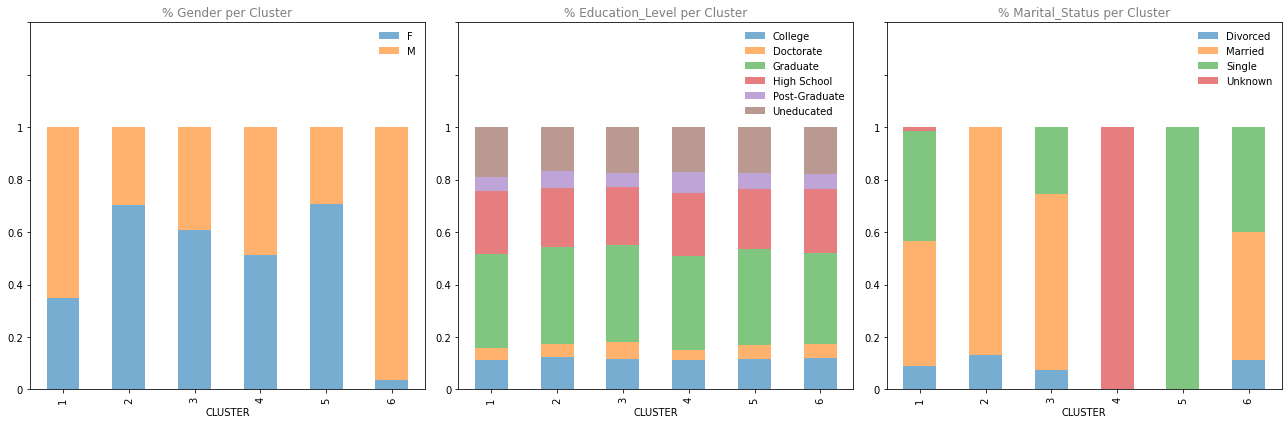

In [28]:
cat_columns = customer.select_dtypes(include=['object'])

fig = plt.figure(figsize=(18, 6))
for i, col in enumerate(cat_columns):
    plot_df = pd.crosstab(index=customer['CLUSTER'], 
                          columns=customer[col], 
                          normalize='index')
    ax = fig.add_subplot(1, 3, i+1)
    plot_df.plot.bar(stacked=True, ax=ax, alpha=0.6)
    ax.set_title(f'% {col.title()} per Cluster', alpha=0.5)

    ax.set_ylim(0, 1.4)
    ax.legend(frameon=False)
    ax.xaxis.grid(False)
    
    labels = [0, 0.2, 0.4, 0.6, 0.8, 1]
    ax.set_yticklabels(labels)

plt.tight_layout()
plt.show()

Considering the categorical variables, we notice that the education level is well divided between clusters. 

In other highlights, Cluster 2 is composed mainly of married people. We do not know the marital status of anybody in Cluster 4, while Cluster 5 is composed entirely of single people. Cluster 6 is almost completely male. 

# Conclusion
As demanded by the company, we have listed the most important characteristics of each cluster. We will also suggest some insights into each cluster. 

### Cluster 1
**Characteristics**     
* Mostly men
* High credit limit
* High amount transitioned
* High number of transactions
* Low utilization ratio

**Insight**    
People with high volume spent on the card, but do not use it on daily basis. Could be incentivised to spend more. 

### Cluster 2
**Characteristics**    
* Mostly women
* Mostly married
* Low estimated income
* Low credit limit
* Low amount transitioned
* High utilization rate

**Insight**    
Married people (majority women) with low income and limit but utilize too much of their credit with a few larger purchases. 

### Cluster 3
**Characteristics**    
* Mostly women
* Older clients
* Low credit limit
* High utilization rate
* Long time customers

**Insight**    
Older people and long-term customers. Mostly women with low credit limits but do have high balances.

### Cluster 4
**Characteristics**    
* Gender well balanced
* Marital status 100% unknown
* Low credit limit
* High amount transitioned
* High utilization rate

**Insight**    
Men and women with low credit limit and have high utilization rate. 

## Cluster 5
**Characteristics**    
* Mostly women
* Marital status 100% single
* Low credit limit
* Low amount transitioned
* High utilization rate

**Insight**    
Low credit limit and transactions, but use the card very often. Could receive benefits to spend more money.

### Cluster 6
**Characteristics**    
* Mostly men
* Mostly single and married
* High estimated income
* High credit limit
* Low amount transitioned
* Low utilization rate

**Insight**     
People with high credit limit yet low utilization rate. Could be incentivized to spend more.